explained variance ratio : [ 0.92461621  0.05301557  0.01718514  0.00518309]


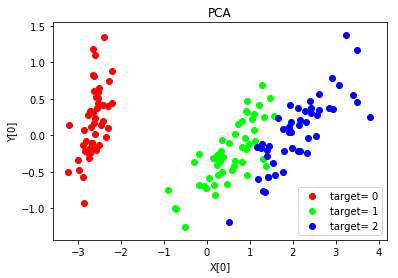

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import   datasets,decomposition

def load_data():
    '''
    加载用于降维的数据

    :return: 一个元组，依次为训练样本集和样本集的标记
    '''
    iris=datasets.load_iris()# 使用 scikit-learn 自带的 iris 数据集
    return  iris.data,iris.target

def test_PCA(*data):
    '''
    测试 PCA 的用法

    :param data:  可变参数。它是一个元组，这里要求其元素依次为：训练样本集、训练样本的标记
    :return: None
    '''
    X,y=data
    pca=decomposition.PCA(n_components=None) # 使用默认的 n_components
    pca.fit(X)
    print('explained variance ratio : %s'% str(pca.explained_variance_ratio_))
def plot_PCA(*data):
    '''
    绘制经过 PCA 降维到二维之后的样本点

    :param data: 可变参数。它是一个元组，这里要求其元素依次为：训练样本集、训练样本的标记
    :return: None
    '''
    X,y=data
    pca=decomposition.PCA(n_components=2) # 目标维度为2维
    pca.fit(X)
    X_r=pca.transform(X) # 原始数据集转换到二维
    ###### 绘制二维数据 ########
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    colors=((1,0,0),(0,1,0),(0,0,1),(0.5,0.5,0),(0,0.5,0.5),(0.5,0,0.5),
        (0.4,0.6,0),(0.6,0.4,0),(0,0.6,0.4),(0.5,0.3,0.2),) # 颜色集合，不同标记的样本染不同的颜色
    for label ,color in zip( np.unique(y),colors):
        position=y==label
        ax.scatter(X_r[position,0],X_r[position,1],label="target= %d"%label,color=color)

    ax.set_xlabel("X[0]")
    ax.set_ylabel("Y[0]")
    ax.legend(loc="best")
    ax.set_title("PCA")
    plt.show()
if __name__=='__main__':
    X,y=load_data() # 产生用于降维的数据集
    test_PCA(X,y)   # 调用 test_PCA
    plot_PCA(X,y)   # 调用 plot_PCA
